# Unit 13 - ETL Project
## Students: Sam Ewing and David Born

## Notebook Contents:
1. Project Report
2. Entity Relationship Diagram (ERD)
3. Code for Extract and Transform

# Project Report

# Extract: your original data sources and how the data was formatted (CSV, JSON, pgAdmin 4, etc).

Both of our original datasets were retrieved from Kaggle.com as .csv files. Included below is the URL and a brief description of each dataset, as well as how each dataset was originally formatted.

# Missing Migrants
URL : https://www.kaggle.com/snocco/missing-migrants-project

### Background
The Missing Migrants database contained data regarding the deaths and disappearances of migrants, refugees, and asylum-seekers from around the globe, ranging between January 2014 and March 2019. According to the publisher, the research behind the Missing Migrants project began with a set of tragedies that occurred in October of 2013, when over 350 people lost their lives in two shipwrecks near the Italian island of Lampedusa. Since it's creation, the Missing Migrants Project has been a major source of data used by the media, researchers and the general public for gaining information in this sector.
An important consideration that the documentation of this data set pointed out (that also influenced many of our data-cleaning and refining decisions, as discussed later) is that the data contained in this data set represents estimates, because many deaths that occur during migration are not reported or go unrecorded. For a deeper explanation on how this consideration impacted our data-processing efforts, please see the Transform section below.

### Original Data Layout
The following is a list of the original columns contained in the raw data set (.csv) and their format.
-Web ID (int)
-Region of Incident (str)
-Reported Date (date - Month dd, YYYY)
-Reported Year (int, YYYY)
-Reported Month (str, first 3 letter abbreviation)
-Number Dead (float)
-Minimum Estimated Number of Missing (float)
-Total Dead and Missing (float)
-Number of Survivors (float)
-Number of Females (float)
-Number of Males (float)
-Number of Children (float)
-Cause of Death (str)
-Location Description (str)
-Information Source (str)
-Location Coordinates (lat, lng)
-Migration Route (str)
-URL (str)
-UNSD Geographical Grouping (str)
-Source Quality (int)

# Border Crossing Entry Data
URL : https://www.kaggle.com/akhilv11/border-crossing-entry-data

### Background
This data set is comprised of summary statistics for incoming-traffic data from the major border crossings around the United States, including along the US-Mexican border and the US-Canadian border. This data set includes data for a variety of transportation methods, including trains, trucks, containers, personal vehicles (cars, trucks and vans), passengers, pedestrians, and buses. This data set does NOT contain data related to out-bound crossings (people / items leaving the US).

### Original Data Layout
The following is a list of the original columns contained in the raw data set (.csv) and their format.
-Port Name (str)
-State (str)
-Port Code (int)
-Border (str)
-Date (datetime (mm/dd/yyyy hh:mm:ss [AM/PM]))
-Measure (str)
-Value (int)
-Location (str (POINT(lng lat))

# Transform: What data cleaning or transformation was required.
This section will discuss how we cleaned and transformed our data step-by-step, as well as our reasoning behind why we chose to clean and transform the data in the way we did. Each cell of our Jupyter notebook has been labeled with a cell number, which corresponds to the cell number in this report. Our guideline for the data transformation were that we wanted to create a 3NF SQL database, since the source data was structured.  The primary tables to query on will be an "incidents" table containing each reported incident of death and/or missing migrants and a "crossings" table containing migrant traffic volume information.  To reduce redundant string values in the columns of each table, and thereby improve storage and query efficiency, we created several supporting lookup (reference) tables.

#### Cell 1
-Import the necessary Python Libraries, which included Pandas and the create_engine function from the sqlalchemy library.

#### Cell 2
Load the Missing Migrants CSV into Pandas using the .read_csv operator. After loading the file, the data is assigned to a dataframe named raw_missing_migrants_df. This dataframe will be maintained throughout the project as a source of the original data. The raw data is then displayed for viewing.

#### Cell 3
The first step in the data cleaning process was to mirror the raw dataframe into the first of three main working dataframes (this one being processed_missing_migrants_df).

Once mirrored, the column names of  processed_missing_migrants_df were renamed for easier processing in SQL (replacing the spaces in the column names with underscores) as well as for clearer definition of each variable. All of the columns from the original data set are retained. Following this, the dataframe is displayed for viewing.

#### Cell 4
The processed_missing_migrants_df from the previous cell is filtered, creating the second of three working dataframes. The applied filtering selects the data for the locale we are most interested in analyzing (along the US-Mexico Border). This new dataframe is called filtered_missing_migrants_df.

Once filtering is complete, the dataframe index is reset and the new dataframe is again displayed for viewing.

#### Cell 5
The filtered_missing_migrants_df dataframe from the cell above is filtered into the third and final working dataframe for the Missing Migrants section, creating the refined_missing_migrants_df dataframe. During this filtering, we select a broad list of the columns we wish to maintain for analysis, which includes (in the following order):

* Incident_ID
* Border
* Date_Reported
* Year_Reported
* Month_Reported
* Fatalities
* Minimum_Estimated_Number_of_Missing
* Total_Dead_and_Missing
* Number_of_Survivors
* Number_of_Females
* Number_of_Males
* Number_of_Children
* Cause_of_Death
* Location_Description
* Location_Coordinates
* URL
* Source_Quality

Some of the columns will be filtered out later-on, as we make critical decisions about our final data set.

#### Cell 6
In order to better categorize our data, we determined that a Cause of Death Category column was needed in order to consolidate the various causes of death cataloged in the data set. To do this, a for-loop was developed to assign a category to each incident based on the contents of the Cause of Death column.

The following is a list of each Cause of Death Category we developed, and the values associated with that category:

-----------------------------------
#### Unknown:
* Unknown (skeletal remains)
* Unknown
* Unknown (decomposed remains)
* Unknown (mummified remains)
* Unknown (mummified and skeletal remains)
-----------------------------------
#### Drowning:
* Drowning
* Presumed Drowning
* Drowning, Asphyxiation
-----------------------------------
#### Exposure:
* Hyperthermia
* Hypothermia
* Presumed hyperthermia
* Probably hyperthermia
* Exposure
* Exposure, Hyperthermia
* Heat stroke
* Presumed hypterthermia / dehydration
-----------------------------------
#### Medical-related:
* Dehydration
* Sickness and lack of access to medicines
* Cardiac arrest
* Pneumonia
* Hypoglycemia
* Coronary artery atherosclerosis
* Envenomation
* Asphyxiation
* Dehydration, Exposure, Hyperthermia
* Dehydration, Hyperthermia
* Hyperthermia, Presumed drowning
* Hyperthermia, Exposure, Dehydration
* Exposure, Dehydration
* Hyperthermia, Dehydration
-----------------------------------
#### Vehicle-related:
* Vehicle Accident
* Hit by vehicle
* Train Accident
* Hit by train
* Fall from vehicle
* Fall from train
-----------------------------------
#### Violence:
* Shot
* Violence
* Unknown (multiple blunt force injuries)
* Murdered
* Excessive Physical Abuse
* Unknown (violence)
* Electrocution
* Hanging
-----------------------------------
#### Suicide:
* Suicide
-----------------------------------
#### Fall:
* Fall from border fence
* Fall into a canyon
-----------------------------------
#### Accident:
* Accident (non-vehicle)
-----------------------------------
#### Mixed:
* Mixed
-----------------------------------
The new Cause of Death Category column is then populated with data, based on the output of the for-loop (stored in a list).

#### Cell 7

The first thing that occurs in this cell is to fill any NaN values in the Minimum_Estimated_Number_of_Missing_Individuals column. This was done manually by a for-loop that examined the values of the Fatalities and the Total_Dead_and_Missing columns. Where the values of these two columns were equal, the Minimum_Estimated_Number_of_Missing_Individuals was assigned a value of 0, while the original value was maintained where the two columns were not equal.
The second action occurring in this cell was the replacement of the Minimum_Estimated_Number_of_Missing_Individuals column with the new values and placing it in the right location.


### IMPORTANT NOTE REGARDING DATA CLEANING: 
It's important to note that we chose NOT for fill every NaN value in our data set. We strongly felt that the NaN values were actually necessary to maintain the integrity of the original data.

For example, some incidents contain NaN values for the Number_of_Females, Number_of_Males, and Number_of_Children columns, while a value exists in the Fatalities column. These columns were likely left unpopulated due to the lack of that information in the original source. Because of this, we found it "untrue" or "unfair" to populate or drop these records.

Another example: There are a small number of incidents with NaN values registered in the Fatalities Column. We associated this with missing persons cases where the individual's body has never been found. Because the person has not been found alive OR dead, we decided to leave those values in their original state, because filling them with a numeric value would be 'untrue' to the original data and the case information.

Because the original data set was created using information from a huge variety of sources, a  lot of the information in the original data set was created using estimates. Keeping in mind that many of the incidents were reported with only partial information, and while investigations into some cases are still underway, we determined it best to leave these parts of the data unchanged.

#### Cell 8
The main action occurring in this cell is to divide the coordinates from the Location_Coordinates column into individual columns of Incident_Lat and Incident_Lng. This was done by splitting the Location_Coordinates column on it's comma delimiter.
The dataframe is then reorganized to its final state. 
The following columns are dropped from the dataframe:
* Border
* Total_Dead_and_Missing
* Location_Coordinates
* Month_Reported
* Year_Reported

As a result, the following columns appear in the final dataframe:
* Incident_ID
* Date_Reported
* Fatalities
* Minimum_Estimated_Number_of_Missing_Individuals
* Number_of_Survivors
* Number_of_Females
* Number_of_Males
* Number_of_Children
* Cause_of_Death_Category
* Cause_of_Death
* Location_Description
* Incident_Lat
* Incident_Lng
* URL
* Source_Quality

The final piece of data-cleaning done to the dataframe in the Missing Migrants section is the conversion of the Date_Reported column to display the date as YYYY-mm-dd in order to match the Border Crossing data.
This cell concludes cleaning and transformation of the Missing Migrants data. A new .csv file is output by the code containing this revised data, which can then be loaded into PostgreSQL.

#### Cell 9
This cell contains a .value_counts function that was used to compare the counts of certain columns during analysis, before the data was loaded into SQL. It can be used to display information about any of the columns in the final Missing Migrants dataframe. 


#### Cell 10
Read source Border_Crossing_Entry_Data.csv from Kaggle into dataframe called raw_border_crossing_df

### usmex_crossing_df – data will be used for “crossings” table in SQL migrants_db

#### Cell 11	
Create copy of raw_border_crossing_df for data transformation and convert data dtype from object to datetime using pandas

#### Cell 12	
Filter “border crossings” data set to the same time frame as the “missing migrants” data, going back to January 1, 2014, but not before

#### Cell 13	
Filter “border crossings” data to “US-Mexico Border”

#### Cell 15	
Clean up “Location” column containing lat-lng coordinates by removing extraneous characters

#### Cell 16	
Split lat-long coordinates into two columns of single, indivisible values

#### Cell 17	
* Rename columns
* Delete extraneous columns (Border, Location)			
* Reset index
* Create a new column with the primary key starting at 1000001 (this table will have the most rows, so we are giving it the largest primary key start value, then as it increments serially it will be unbounded by other primary key values)
* Re-organized columns into desired order

After Cell 17, the usmex_crossing_df is ready to be used to filter and create the port_df (Cell 18).

#### Cell 19
After the port_df is created in Cell 18, the the usmex_crossing_df is further reduced by deleting columns that will be available in the port_df (Port_Name, State, Port_Lat, Port_Lng)

### port_df  – data will be used for “port” lookup (reference) table in SQL migrants_db

#### Cell 18 
* Create new port dataframe by filtering required columns from usmex_crossing_df
* Get unique port code values by dropping duplicates
* Reset index

### incident_distance_to_port_df is used as a intermediate processing step

This table will contain the missing migrant incident ID, incident lat-lngs, and the distance of the incident to each crossing port.

#### Cell 20
Create a new dataframe initially consisting of the Incident_ID, Incident_Lat, and Incident_Lng columns from the refined_missing_migrants_df.

#### Cells 21-22
Using nested loops and the haversine library, calculate the distance from each incident to each port.  Then output each port as a new column in the incident_distance_to_port_df with the values representing the distance to each incident.

### incident_nearest_port_df will be used for the “nearest_port” lookup (reference) table in SQL migrants_db
This table will contain the missing migrant incident ID along with the nearest crossing port to the incident location.

#### Cell 23
* Create a copy of the incident_distance_to_port_df
* Delete incident lat-lng columns (retain the incident_id as the value to join on in SQL)
* Create a new column called “Nearest_Port” which contains the Port_Code for the nearest port as found using a row minimum function

#### Cell 24
* Reduce the dataframe by keeping only the Incident_ID and Nearest_Port columns
* Create a new column with the primary key starting at 100001 (with less than 1,500 incidents, this starting point for the primary key leaves sufficient room to increment serially as incident data is added without overlapping the crossings primary key (which starts at 1000001).

### measures_df will be used for “measures” lookup (reference) table in SQL migrants_db
This dataframe will provide coding for the type of border crossing *measure* (e.g., personal vehicles, buses, pedestrians, etc.). **Note: the primary_key for the “measures” table will be used to populate the “measure_code” column in the SQL “crossings” table, so that strings describing the measure value don’t have to be stored for thousands of rows in the “crossings” table.**

#### Cell 25
* Create new dataframe with “measures” column from usmex_crossing_df
* Drop duplicate measure values leaving only unique measure values
* Sort measure values ascending simply to facilitate visual inspection of the lookup table
* Reset the index
* Create a new column with the primary key starting at 11 (there are only about a dozen unique measure values, so this primary key starting point leaves enough room to increment serially without overlapping the cause_of_death primary key, which starts at 101).

### cause_of_death_df will be used for “cause_of_death” lookup (reference) table in SQL migrants_db
This dataframe will provide coding for the cause_of_death and cause_of_death category as created in Cell 6 (e.g., drowning, exposure, violence, etc.). **Note: the primary_key for the “cause_of_death” table will be used to populate the “cause_of_death_code” column in the SQL “incidents” table, so that strings describing the cause_of_death and cause_of_death_category values don’t have to be stored for thousands of rows in the “incidents” table.**

#### Cell 26
* Create new dataframe with “Cause_of_Death” and “Cause_of_Death_Category” columns from refined_missing_migrants_df (Cell 8)
* Drop duplicate Cause_of_Death values leaving only unique Cause_of_Death values
* Sort Category values ascending then secondary sort by Cause_of_Death values, simply to facilitate visual inspection of the lookup table
* Reset the index
* Create a new column with the primary key starting at 101 (there are about 50 unique cause_of_death values, so this primary key starting point leaves enough room to increment serially without overlapping the location_description primary key, which starts at 1001).

### location_df will be used for “location_description” lookup (reference) table in SQL migrants_db
This dataframe will provide coding for the location_description, which can be an address, a town, an area, or something as broad as “desert of Mexico”. **Note: the primary_key for the “location_description” table will be used to populate the “location_code” column in the SQL “incidents” table, so that strings describing the location_description don’t have to be stored for thousands of rows in the “incidents” table.**

#### Cell 27
* Create new dataframe with “Location_Description” column from refined_missing_migrants_df (Cell 8)
* Drop duplicate Location_Description values leaving only unique Location_Description values
* Sort Location_Description values ascending simply to facilitate visual inspection of the lookup table
* Reset the index
* Create a new column with the primary key starting at 1001 (there are about 570 unique Location_Description values, so this primary key starting point leaves enough room to increment serially without overlapping the URL primary key, which starts at 10001).

### url_df will be used for “url_description” lookup (reference) table in SQL migrants_db
This dataframe will provide coding for the url_description, which represents additional information (if any) pertaining to the reported incident. **Note: the primary_key for the “url_description” table will be used to populate the “url_code” column in the SQL “incidents” table, so that strings describing the url_description don’t have to be stored for thousands of rows in the “incidents” table.**

#### Cell 28
* Create new dataframe with “URL” column from refined_missing_migrants_df (Cell 8)
* Drop duplicate URL values leaving only unique URL values
* Sort URL values ascending simply to facilitate visual inspection of the lookup table
* Reset the index
* Create a new column with the primary key starting at 10001 (there are over 400 unique URL values, so this primary key starting point leaves enough room to increment serially without overlapping the nearest_port primary key, which starts at 100001).

### source_quality_df will be used for “source_quality” lookup (reference) table in SQL migrants_db
This dataframe will provide coding and description for the source_quality.  The raw data already has source_quality codes where a value of “1” is the lowest quality and a value of “5” is the highest. **Note: the primary_key for the “source_quality” table is the “source_quality_code” column in the SQL “incidents” table, so that strings describing the source_quality don’t have to be stored for thousands of rows in the “incidents” table.**

#### Cell 29
This dataframe is created from scratch by putting lists of quality codes and descriptions into a dictionary and creating a dataframe from the dictionary.  The codes and descriptions were obtained from the data set documentation on Kaggle.

### create crossings_df to be used for the “crossings” table in SQL migrants_db 
#### populate measures_df primary key as foreign key in the crossings_df

#### Cell 30
Populates the primary_key from the “measures_df” to the “measure_code” column in the “crossings_df”.  The “measure_code” column will be a foreign key for looking up descriptions of measures.
* Create a new dataframe called crossings_df by merging usmex_crossings_df and measures_df on “Measure” column, left join (this adds the primary key from  the measures_df)
* Delete “Measure” column as this contains the strings that we want to eliminate for efficiency
* Rename columns to product the “Measure_Code” column in the crossings_df

### create incidents_df to be used for the “incidents” table in SQL migrants_db 
#### populate cause_df, location_df, and url_df primary keys as foreign keys in the incidents_df

#### Cell 31
Populates the primary_key from the “cause_df” to the “cause_of_death_code” column in the “incidents_df”.  The “cause_of_death_code” column will be a foreign key for looking up descriptions of cause_of_death and cause_of_death_category.
* Create a new dataframe called “incidents_df” by merging “refined_missing_migrants_df”  and “cause_df” on “Cause_of_Death” column, left join (this adds the primary key from  the cause_df)
* Delete “Cause_of_Death” and “Cause_of_Death_Category” columns as they contain the strings that we want to eliminate for efficiency
* Rename primary key column from cause_df to produce the “Cause_of_Death_Code” column in the incidents_df

#### Cell 32
Populates the primary_key from the “location_df” to the “location_code” column in the “incidents_df”.  The “location_code” column will be a foreign key for looking up descriptions of incident locations.
* Merge the “incidents_df”  and “location_df” on “Location_Description” column, left join (this adds the primary key from  the location_df)
* Delete the “Location_Description” column as it contains the strings that we want to eliminate for efficiency
* Rename primary key column from location_df to produce the “Location_Code” column in the incidents_df

#### Cell 33
Populates the primary_key from the “url_df” to the “url_code” column in the “incidents_df”.  The “url_code” column will be a foreign key for looking up descriptions of incident locations.
* Merge the “incidents_df”  and “url_df” on “URL” column, left join (this adds the primary key from  the url_df)
* Delete the “URL” column as it contains the strings that we want to eliminate for efficiency
* Rename primary key column from url_df to produce the “URL_Code” column in the incidents_df

#### Cell 34
Re-organize the columns in the incidents_df to be in the same order as the columns in the incidents table in the SQL migrants_db.

#### Cell 35
Outputs the transformed dataframes as .csv files without index for loading into SQL.  There are nine files with each named for the corresponding SQL migrants_db table:
1. crossings.csv
2. incidents.csv
3. ports.csv
4. measures.csv
5. nearest_port.csv
6. cause_of_death.csv
7. location_description.csv
8. url_desccription.csv
9. source_quality.csv


# ERD of migrants_db

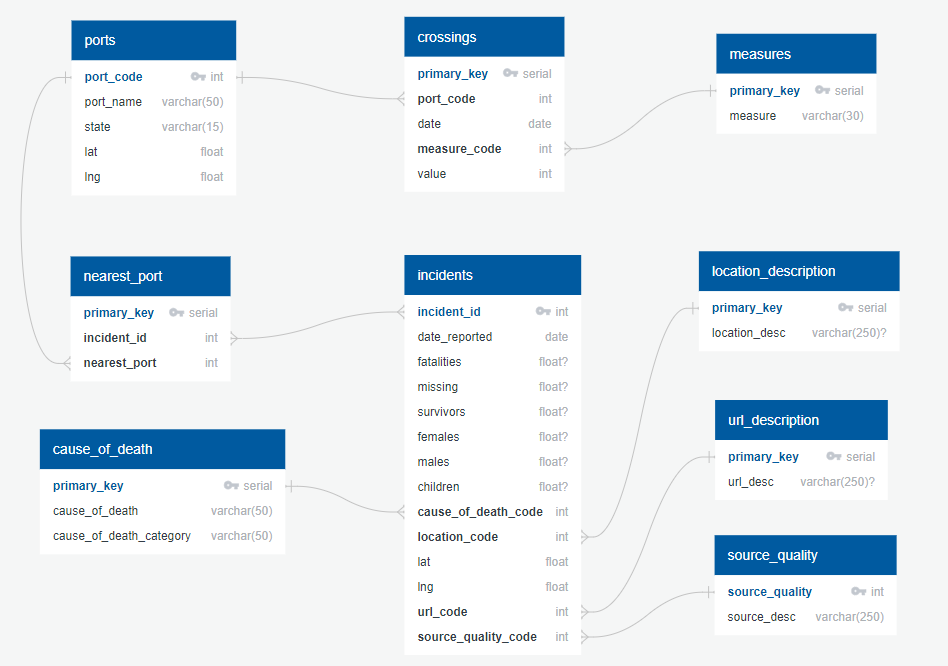

In [1]:
# Cell 1
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Cell 2
# Import Raw Missing Migrants Project Data
filepath_missing_migrant = "Resources/MissingMigrants-Global-2019-03-29T18-36-07.csv"
raw_missing_migrants_df = pd.read_csv(filepath_missing_migrant)
raw_missing_migrants_df.head()

Web ID Region of Incident   Reported Date  Reported Year Reported Month  \
0   51591      Mediterranean  March 28, 2019           2019            Mar   
1   51588      Mediterranean  March 26, 2019           2019            Mar   
2   51589      Mediterranean  March 26, 2019           2019            Mar   
3   51590      Mediterranean  March 26, 2019           2019            Mar   
4   51587    Central America  March 25, 2019           2019            Mar   

   Number Dead  Minimum Estimated Number of Missing  Total Dead and Missing  \
0          NaN                                  2.0                       2   
1          4.0                                  NaN                       4   
2          1.0                                  NaN                       1   
3          1.0                                  NaN                       1   
4          1.0                                  NaN                       1   

   Number of Survivors  Number of Females  Number of Males  \
0                 36.0                NaN              2.0   
1                 11.0                3.0              NaN   
2                  NaN                NaN              NaN   
3                  NaN                NaN              NaN   
4                  NaN                NaN              1.0   

   Number of Children     Cause of Death  \
0                 NaN  Presumed drowning   
1                 1.0  Presumed drowning   
2                 NaN  Presumed drowning   
3                 NaN  Presumed drowning   
4                 NaN    Fall from train   

                                Location Description  \
0                     Off the coast of Chios, Greece   
1  Off the coast of Ayvacık district, Çanakkale p...   
2  Body recovered on Playa del Tarajal, Ceuta, Sp...   
3  Body recovered on beach near Tetouan, Morocco ...   
4         Train tracks in Teacalco, Tlaxcala, Mexico   

                    Information Source               Location Coordinates  \
0  Hellenic Coast Guard via IOM Greece   38.362368696592, 26.172509473654   
1   Turkish Coast Guard via IOM Turkey   39.441975591614, 26.378816195919   
2     Ceuta al día, El Pueblo de Ceuta   35.871901875921, -5.343037665842   
3                   El Pueblo de Ceuta   35.635115912988, -5.275650103548   
4      Megalópolis, Línea de contraste  19.334475177429, -98.069823987538   

         Migration Route                                           URL  \
0  Eastern Mediterranean                                           NaN   
1  Eastern Mediterranean                         http://bit.ly/2YmiPAN   
2  Western Mediterranean  http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC   
3  Western Mediterranean                         http://bit.ly/2uwj5zC   
4                    NaN  http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS   

  UNSD Geographical Grouping  Source Quality  
0              Uncategorized               5  
1              Uncategorized               5  
2              Uncategorized               3  
3              Uncategorized               1  
4            Central America               3

In [3]:
# Cell 3
# Rename columns for easier SQL use
processed_missing_migrants_df = raw_missing_migrants_df
processed_missing_migrants_df = processed_missing_migrants_df.rename(columns={
    "Web ID" : "Incident_ID",
    "Region of Incident" : "Border",
    "Reported Date" : "Date_Reported",
    "Reported Year" : "Year_Reported",
    "Reported Month" : "Month_Reported",
    "Number Dead" : "Fatalities",
    "Minimum Estimated Number of Missing" : "Minimum_Estimated_Number_of_Missing",
    "Total Dead and Missing" : "Total_Dead_and_Missing",
    "Number of Survivors" : "Number_of_Survivors",
    "Number of Females" : "Number_of_Females",
    "Number of Males" : "Number_of_Males",
    "Number of Children" : "Number_of_Children",
    "Cause of Death" : "Cause_of_Death",
    "Location Description" : "Location_Description",
    "Information Source" : "Information_Source",
    "Location Coordinates" : "Location_Coordinates",
    "Migration Route" : "Migration_Route",
    "URL" : "URL",
    "UNSD Geographical Grouping" : "UNSD_Geographical_Grouping",
    "Source Quality" : "Source_Quality"  
}) 
processed_missing_migrants_df.head()

Incident_ID           Border   Date_Reported  Year_Reported Month_Reported  \
0        51591    Mediterranean  March 28, 2019           2019            Mar   
1        51588    Mediterranean  March 26, 2019           2019            Mar   
2        51589    Mediterranean  March 26, 2019           2019            Mar   
3        51590    Mediterranean  March 26, 2019           2019            Mar   
4        51587  Central America  March 25, 2019           2019            Mar   

   Fatalities  Minimum_Estimated_Number_of_Missing  Total_Dead_and_Missing  \
0         NaN                                  2.0                       2   
1         4.0                                  NaN                       4   
2         1.0                                  NaN                       1   
3         1.0                                  NaN                       1   
4         1.0                                  NaN                       1   

   Number_of_Survivors  Number_of_Females  Number_of_Males  \
0                 36.0                NaN              2.0   
1                 11.0                3.0              NaN   
2                  NaN                NaN              NaN   
3                  NaN                NaN              NaN   
4                  NaN                NaN              1.0   

   Number_of_Children     Cause_of_Death  \
0                 NaN  Presumed drowning   
1                 1.0  Presumed drowning   
2                 NaN  Presumed drowning   
3                 NaN  Presumed drowning   
4                 NaN    Fall from train   

                                Location_Description  \
0                     Off the coast of Chios, Greece   
1  Off the coast of Ayvacık district, Çanakkale p...   
2  Body recovered on Playa del Tarajal, Ceuta, Sp...   
3  Body recovered on beach near Tetouan, Morocco ...   
4         Train tracks in Teacalco, Tlaxcala, Mexico   

                    Information_Source               Location_Coordinates  \
0  Hellenic Coast Guard via IOM Greece   38.362368696592, 26.172509473654   
1   Turkish Coast Guard via IOM Turkey   39.441975591614, 26.378816195919   
2     Ceuta al día, El Pueblo de Ceuta   35.871901875921, -5.343037665842   
3                   El Pueblo de Ceuta   35.635115912988, -5.275650103548   
4      Megalópolis, Línea de contraste  19.334475177429, -98.069823987538   

         Migration_Route                                           URL  \
0  Eastern Mediterranean                                           NaN   
1  Eastern Mediterranean                         http://bit.ly/2YmiPAN   
2  Western Mediterranean  http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC   
3  Western Mediterranean                         http://bit.ly/2uwj5zC   
4                    NaN  http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS   

  UNSD_Geographical_Grouping  Source_Quality  
0              Uncategorized               5  
1              Uncategorized               5  
2              Uncategorized               3  
3              Uncategorized               1  
4            Central America               3

In [4]:
# Cell 4
# Filter missing people data to the locale we are interested in (US-Mexico Border)
filtered_missing_migrants_df = processed_missing_migrants_df[(processed_missing_migrants_df['Border']=='US-Mexico Border')]
filtered_missing_migrants_df = filtered_missing_migrants_df.reset_index()
filtered_missing_migrants_df.head()

index  Incident_ID            Border   Date_Reported  Year_Reported  \
0      5        51580  US-Mexico Border  March 23, 2019           2019   
1      6        51581  US-Mexico Border  March 23, 2019           2019   
2      9        51578  US-Mexico Border  March 21, 2019           2019   
3     10        51579  US-Mexico Border  March 21, 2019           2019   
4     16        51577  US-Mexico Border  March 15, 2019           2019   

  Month_Reported  Fatalities  Minimum_Estimated_Number_of_Missing  \
0            Mar         1.0                                  NaN   
1            Mar         1.0                                  NaN   
2            Mar         1.0                                  NaN   
3            Mar         1.0                                  NaN   
4            Mar         1.0                                  NaN   

   Total_Dead_and_Missing  Number_of_Survivors  ...  Number_of_Males  \
0                       1                  NaN  ...              NaN   
1                       1                  NaN  ...              NaN   
2                       1                  NaN  ...              NaN   
3                       1                  NaN  ...              NaN   
4                       1                  NaN  ...              NaN   

   Number_of_Children              Cause_of_Death  \
0                 NaN  Unknown (skeletal remains)   
1                 NaN  Unknown (skeletal remains)   
2                 NaN  Unknown (skeletal remains)   
3                 NaN  Unknown (skeletal remains)   
4                 NaN  Unknown (skeletal remains)   

                     Location_Description  \
0  Pima County jurisdiction, Arizona, USA   
1  Pima County jurisdiction, Arizona, USA   
2  Pima County jurisdiction, Arizona, USA   
3  Pima County jurisdiction, Arizona, USA   
4  Pima County jurisdiction, Arizona, USA   

                           Information_Source  \
0  Pima County Office of the Medical Examiner   
1  Pima County Office of the Medical Examiner   
2  Pima County Office of the Medical Examiner   
3  Pima County Office of the Medical Examiner   
4  Pima County Office of the Medical Examiner   

                 Location_Coordinates Migration_Route  \
0  32.057499000000, -111.666072500000             NaN   
1  32.057499000000, -111.666072500000             NaN   
2  32.057499000000, -111.666072500000             NaN   
3  32.057499000000, -111.666072500000             NaN   
4  32.331803200000, -112.524509300000             NaN   

                              URL UNSD_Geographical_Grouping Source_Quality  
0  http://www.humaneborders.info/           Northern America              5  
1  http://www.humaneborders.info/           Northern America              5  
2  http://www.humaneborders.info/           Northern America              5  
3  http://www.humaneborders.info/           Northern America              5  
4  http://www.humaneborders.info/           Northern America              5  

[5 rows x 21 columns]

In [5]:
# Cell 5
# Convert filtered dataframe to working dataframe
refined_missing_migrants_df = filtered_missing_migrants_df[[
    'Incident_ID',
    'Border',
    'Date_Reported', 
    'Year_Reported', 
    'Month_Reported', 
    'Fatalities',
    'Minimum_Estimated_Number_of_Missing',
    'Total_Dead_and_Missing',
    'Number_of_Survivors',
    'Number_of_Females',
    'Number_of_Males',
    'Number_of_Children',
    'Cause_of_Death',
    'Location_Description',
    'Location_Coordinates',
    'URL',
    'Source_Quality'
]]

refined_missing_migrants_df.head()

Incident_ID            Border   Date_Reported  Year_Reported  \
0        51580  US-Mexico Border  March 23, 2019           2019   
1        51581  US-Mexico Border  March 23, 2019           2019   
2        51578  US-Mexico Border  March 21, 2019           2019   
3        51579  US-Mexico Border  March 21, 2019           2019   
4        51577  US-Mexico Border  March 15, 2019           2019   

  Month_Reported  Fatalities  Minimum_Estimated_Number_of_Missing  \
0            Mar         1.0                                  NaN   
1            Mar         1.0                                  NaN   
2            Mar         1.0                                  NaN   
3            Mar         1.0                                  NaN   
4            Mar         1.0                                  NaN   

   Total_Dead_and_Missing  Number_of_Survivors  Number_of_Females  \
0                       1                  NaN                NaN   
1                       1                  NaN                NaN   
2                       1                  NaN                NaN   
3                       1                  NaN                NaN   
4                       1                  NaN                NaN   

   Number_of_Males  Number_of_Children              Cause_of_Death  \
0              NaN                 NaN  Unknown (skeletal remains)   
1              NaN                 NaN  Unknown (skeletal remains)   
2              NaN                 NaN  Unknown (skeletal remains)   
3              NaN                 NaN  Unknown (skeletal remains)   
4              NaN                 NaN  Unknown (skeletal remains)   

                     Location_Description                Location_Coordinates  \
0  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
1  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
2  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
3  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
4  Pima County jurisdiction, Arizona, USA  32.331803200000, -112.524509300000   

                              URL  Source_Quality  
0  http://www.humaneborders.info/               5  
1  http://www.humaneborders.info/               5  
2  http://www.humaneborders.info/               5  
3  http://www.humaneborders.info/               5  
4  http://www.humaneborders.info/               5

In [6]:
# Cell 6
# Create a new column with a Cause of Death Category for each incident
cod_category_list=[]
for cause in refined_missing_migrants_df.iterrows():
    if (cause[1][12] == 'Unknown (skeletal remains)') or (cause[1][12] == 'Unknown') or (cause[1][12] == 'Unknown (decomposed remains)') or (cause[1][12] == 'Unknown (mummified remains)') or (cause[1][12] == 'Unknown (mummified and skeletal remains)'): 
        cod_category_list.append('Unknown')
    elif (cause[1][12] == 'Drowning') or (cause[1][12] == 'Presumed drowning') or (cause[1][12] == 'Drowning, Asphyxiation'):
        cod_category_list.append('Drowning')
    elif (cause[1][12] == 'Hyperthermia') or (cause[1][12] == 'Hypothermia') or (cause[1][12] == 'Presumed hyperthermia') or (cause[1][12] == 'Probable hyperthermia') or (cause[1][12] == 'Exposure') or (cause[1][12] == 'Exposure, Hyperthermia') or (cause[1][12] == 'Heat stroke') or (cause[1][12] == 'Presumed hyperthermia/dehydration'):
        cod_category_list.append('Exposure')
    elif (cause[1][12] == 'Dehydration') or (cause[1][12] == 'Sickness and lack of access to medicines') or (cause[1][12] == 'Cardiac arrest') or (cause[1][12] == 'Pneumonia') or (cause[1][12] == 'Hypoglycemia') or (cause[1][12] == 'Coronary artery atherosclerosis') or (cause[1][12] == 'Envenomation') or (cause[1][12] == 'Asphyxiation') or (cause[1][12] == 'Dehydration, Exposure, Hyperthermia') or (cause[1][12] == 'Dehydration, Hyperthermia') or (cause[1][12] == 'Hyperthermia, Presumed drowning') or (cause[1][12] == 'Hyperthermia, Exposure, Dehydration') or (cause[1][12] == 'Exposure, Dehydration') or (cause[1][12] == 'Hyperthermia, Dehydration'):
        cod_category_list.append('Medical-related')
    elif (cause[1][12] == 'Vehicle Accident') or (cause[1][12] == 'Hit by vehicle') or (cause[1][12] == 'Train Accident') or (cause[1][12] == 'Hit by train') or (cause[1][12] == 'Fall from vehicle') or (cause[1][12] == 'Fall from train'):
        cod_category_list.append('Vehicle-related')
    elif (cause[1][12] == 'Shot') or (cause[1][12] == 'Violence') or (cause[1][12] == 'Unknown (multiple blunt force injuries)') or (cause[1][12] == 'Murdered') or (cause[1][12] == 'Excessive Physical Abuse') or (cause[1][12] == 'Unknown (violence)') or (cause[1][12] == 'Electrocution') or (cause[1][12] == 'Hanging'): 
        cod_category_list.append('Violence')
    elif (cause[1][12] == 'Suicide'):
        cod_category_list.append('Suicide')
    elif (cause[1][12] == 'Fall from border fence') or (cause[1][12] == 'Fall into a canyon'):
        cod_category_list.append('Fall')
    elif (cause[1][12] == 'Accident (non-vehicle)'):
        cod_category_list.append('Accident')
    elif (cause[1][12] == 'Mixed'):
        cod_category_list.append('Mixed')

refined_missing_migrants_df['Cause_of_Death_Category'] = cod_category_list
refined_missing_migrants_df.head()

C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Incident_ID            Border   Date_Reported  Year_Reported  \
0        51580  US-Mexico Border  March 23, 2019           2019   
1        51581  US-Mexico Border  March 23, 2019           2019   
2        51578  US-Mexico Border  March 21, 2019           2019   
3        51579  US-Mexico Border  March 21, 2019           2019   
4        51577  US-Mexico Border  March 15, 2019           2019   

  Month_Reported  Fatalities  Minimum_Estimated_Number_of_Missing  \
0            Mar         1.0                                  NaN   
1            Mar         1.0                                  NaN   
2            Mar         1.0                                  NaN   
3            Mar         1.0                                  NaN   
4            Mar         1.0                                  NaN   

   Total_Dead_and_Missing  Number_of_Survivors  Number_of_Females  \
0                       1                  NaN                NaN   
1                       1                  NaN                NaN   
2                       1                  NaN                NaN   
3                       1                  NaN                NaN   
4                       1                  NaN                NaN   

   Number_of_Males  Number_of_Children              Cause_of_Death  \
0              NaN                 NaN  Unknown (skeletal remains)   
1              NaN                 NaN  Unknown (skeletal remains)   
2              NaN                 NaN  Unknown (skeletal remains)   
3              NaN                 NaN  Unknown (skeletal remains)   
4              NaN                 NaN  Unknown (skeletal remains)   

                     Location_Description                Location_Coordinates  \
0  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
1  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
2  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
3  Pima County jurisdiction, Arizona, USA  32.057499000000, -111.666072500000   
4  Pima County jurisdiction, Arizona, USA  32.331803200000, -112.524509300000   

                              URL  Source_Quality Cause_of_Death_Category  
0  http://www.humaneborders.info/               5                 Unknown  
1  http://www.humaneborders.info/               5                 Unknown  
2  http://www.humaneborders.info/               5                 Unknown  
3  http://www.humaneborders.info/               5                 Unknown  
4  http://www.humaneborders.info/               5                 Unknown

In [7]:
# Cell 7
# Fill values for minimum number of missing
minimum_missing_counter = []
for estimate in refined_missing_migrants_df.iterrows():
    if estimate[1][5] == estimate[1][7]:
        minimum_missing_counter.append(int(0.0))
    else:
        minimum_missing_counter.append(estimate[1][6])
refined_missing_migrants_df['Minimum_Estimated_Number_of_Missing_Individuals'] = minimum_missing_counter
refined_missing_migrants_df = refined_missing_migrants_df[[
    'Incident_ID',
    'Border',
    'Date_Reported', 
    'Year_Reported', 
    'Month_Reported', 
    'Fatalities',
    'Minimum_Estimated_Number_of_Missing_Individuals',
    'Total_Dead_and_Missing',
    'Number_of_Survivors',
    'Number_of_Females',
    'Number_of_Males',
    'Number_of_Children',
    'Cause_of_Death_Category',
    'Cause_of_Death',
    'Location_Description',
    'Location_Coordinates',
    'URL',
    'Source_Quality'
]]

refined_missing_migrants_df.head()

C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Incident_ID            Border   Date_Reported  Year_Reported  \
0        51580  US-Mexico Border  March 23, 2019           2019   
1        51581  US-Mexico Border  March 23, 2019           2019   
2        51578  US-Mexico Border  March 21, 2019           2019   
3        51579  US-Mexico Border  March 21, 2019           2019   
4        51577  US-Mexico Border  March 15, 2019           2019   

  Month_Reported  Fatalities  Minimum_Estimated_Number_of_Missing_Individuals  \
0            Mar         1.0                                              0.0   
1            Mar         1.0                                              0.0   
2            Mar         1.0                                              0.0   
3            Mar         1.0                                              0.0   
4            Mar         1.0                                              0.0   

   Total_Dead_and_Missing  Number_of_Survivors  Number_of_Females  \
0                       1                  NaN                NaN   
1                       1                  NaN                NaN   
2                       1                  NaN                NaN   
3                       1                  NaN                NaN   
4                       1                  NaN                NaN   

   Number_of_Males  Number_of_Children Cause_of_Death_Category  \
0              NaN                 NaN                 Unknown   
1              NaN                 NaN                 Unknown   
2              NaN                 NaN                 Unknown   
3              NaN                 NaN                 Unknown   
4              NaN                 NaN                 Unknown   

               Cause_of_Death                    Location_Description  \
0  Unknown (skeletal remains)  Pima County jurisdiction, Arizona, USA   
1  Unknown (skeletal remains)  Pima County jurisdiction, Arizona, USA   
2  Unknown (skeletal remains)  Pima County jurisdiction, Arizona, USA   
3  Unknown (skeletal remains)  Pima County jurisdiction, Arizona, USA   
4  Unknown (skeletal remains)  Pima County jurisdiction, Arizona, USA   

                 Location_Coordinates                             URL  \
0  32.057499000000, -111.666072500000  http://www.humaneborders.info/   
1  32.057499000000, -111.666072500000  http://www.humaneborders.info/   
2  32.057499000000, -111.666072500000  http://www.humaneborders.info/   
3  32.057499000000, -111.666072500000  http://www.humaneborders.info/   
4  32.331803200000, -112.524509300000  http://www.humaneborders.info/   

   Source_Quality  
0               5  
1               5  
2               5  
3               5  
4               5

In [8]:
# Cell 8
# Split coordinates into separate Lat and Long columns
refined_missing_migrants_df['Incident_Lat'] = refined_missing_migrants_df['Location_Coordinates'].str.split(',').str[0]
refined_missing_migrants_df['Incident_Lng'] = refined_missing_migrants_df['Location_Coordinates'].str.split(',').str[1]
refined_missing_migrants_df[['Incident_Lat', 'Incident_Lng']] = \
                            refined_missing_migrants_df[['Incident_Lat', 'Incident_Lng']].apply(pd.to_numeric)

# Reorganize dataframe to mirror original dataset
refined_missing_migrants_df = refined_missing_migrants_df.drop(columns=['Border', 'Total_Dead_and_Missing', 'Location_Coordinates', 'Month_Reported', 'Year_Reported'])
refined_missing_migrants_df = refined_missing_migrants_df[[
    'Incident_ID',
    'Date_Reported', 
    'Fatalities',
    'Minimum_Estimated_Number_of_Missing_Individuals',
    'Number_of_Survivors',
    'Number_of_Females', 
    'Number_of_Males',
    'Number_of_Children',
    'Cause_of_Death_Category',
    'Cause_of_Death',
    'Location_Description',
    'Incident_Lat',
    'Incident_Lng',
    'URL',
    'Source_Quality']]
refined_missing_migrants_df['Date_Reported'] = pd.to_datetime(refined_missing_migrants_df['Date_Reported'])
refined_missing_migrants_df.head()

Incident_ID Date_Reported  Fatalities  \
0        51580    2019-03-23         1.0   
1        51581    2019-03-23         1.0   
2        51578    2019-03-21         1.0   
3        51579    2019-03-21         1.0   
4        51577    2019-03-15         1.0   

   Minimum_Estimated_Number_of_Missing_Individuals  Number_of_Survivors  \
0                                              0.0                  NaN   
1                                              0.0                  NaN   
2                                              0.0                  NaN   
3                                              0.0                  NaN   
4                                              0.0                  NaN   

   Number_of_Females  Number_of_Males  Number_of_Children  \
0                NaN              NaN                 NaN   
1                NaN              NaN                 NaN   
2                NaN              NaN                 NaN   
3                NaN              NaN                 NaN   
4                NaN              NaN                 NaN   

  Cause_of_Death_Category              Cause_of_Death  \
0                 Unknown  Unknown (skeletal remains)   
1                 Unknown  Unknown (skeletal remains)   
2                 Unknown  Unknown (skeletal remains)   
3                 Unknown  Unknown (skeletal remains)   
4                 Unknown  Unknown (skeletal remains)   

                     Location_Description  Incident_Lat  Incident_Lng  \
0  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
1  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
2  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
3  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
4  Pima County jurisdiction, Arizona, USA     32.331803   -112.524509   

                              URL  Source_Quality  
0  http://www.humaneborders.info/               5  
1  http://www.humaneborders.info/               5  
2  http://www.humaneborders.info/               5  
3  http://www.humaneborders.info/               5  
4  http://www.humaneborders.info/               5

In [9]:
# Cell 9
refined_missing_migrants_df['Fatalities'].value_counts()

1.0      1270
2.0        25
3.0         7
4.0         6
5.0         4
18.0        2
8.0         2
6.0         2
25.0        1
10.0        1
50.0        1
7.0         1
48.0        1
38.0        1
28.0        1
11.0        1
126.0       1
149.0       1
Name: Fatalities, dtype: int64

In [10]:
# Cell 10
filepath_border_crossing = "Resources/Border_Crossing_Entry_Data.csv"
raw_border_crossing_df = pd.read_csv(filepath_border_crossing)
raw_border_crossing_df.head()

Port Name       State  Port Code            Border  \
0  Calexico East  California       2507  US-Mexico Border   
1      Van Buren       Maine        108  US-Canada Border   
2      Otay Mesa  California       2506  US-Mexico Border   
3        Nogales     Arizona       2604  US-Mexico Border   
4    Trout River    New York        715  US-Canada Border   

                     Date                      Measure  Value  \
0  03/01/2019 12:00:00 AM                       Trucks  34447   
1  03/01/2019 12:00:00 AM         Rail Containers Full    428   
2  03/01/2019 12:00:00 AM                       Trucks  81217   
3  03/01/2019 12:00:00 AM                       Trains     62   
4  03/01/2019 12:00:00 AM  Personal Vehicle Passengers  16377   

                                Location  
0   POINT (-115.48433000000001 32.67524)  
1             POINT (-67.94271 47.16207)  
2            POINT (-117.05333 32.57333)  
3  POINT (-110.93361 31.340279999999996)  
4   POINT (-73.44253 44.990010000000005)

# check crossing_df row counts for NaN, check and modify dtypes

In [11]:
# Cell 11
# make a work-in-process (wip) copy of the raw df and convert Date column from dtype object to datetime
wip_border_crossing_df = raw_border_crossing_df
wip_border_crossing_df['Date'] = pd.to_datetime(wip_border_crossing_df['Date'])
wip_border_crossing_df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Location             object
dtype: object

## filter crossing_df by relevant time frame and US-Mexico border ports

In [12]:
# Cell 12
# create a timestamp representing beginning of desired time span and use it to filter wip df into new df, check counts
ts = pd.to_datetime('1/1/2014')
from2014_crossing = wip_border_crossing_df.loc[wip_border_crossing_df.Date >= ts, :]
from2014_crossing.count()

Port Name    67193
State        67193
Port Code    67193
Border       67193
Date         67193
Measure      67193
Value        67193
Location     67193
dtype: int64

In [13]:
# Cell 13
# filter the df for 'US-Mexico Border' which is the relevant geography, check counts
usmex_crossing_df = from2014_crossing.loc[from2014_crossing["Border"] == "US-Mexico Border"]
usmex_crossing_df.count()

Port Name    15746
State        15746
Port Code    15746
Border       15746
Date         15746
Measure      15746
Value        15746
Location     15746
dtype: int64

In [14]:
# Cell 14
usmex_crossing_df.head()

Port Name       State  Port Code            Border       Date  \
0   Calexico East  California       2507  US-Mexico Border 2019-03-01   
2       Otay Mesa  California       2506  US-Mexico Border 2019-03-01   
3         Nogales     Arizona       2604  US-Mexico Border 2019-03-01   
7        Progreso       Texas       2309  US-Mexico Border 2019-03-01   
19     San Ysidro  California       2504  US-Mexico Border 2019-03-01   

                   Measure  Value                               Location  
0                   Trucks  34447   POINT (-115.48433000000001 32.67524)  
2                   Trucks  81217            POINT (-117.05333 32.57333)  
3                   Trains     62  POINT (-110.93361 31.340279999999996)  
7   Truck Containers Empty   1808   POINT (-97.94889 26.061670000000003)  
19          Bus Passengers   7779   POINT (-117.02666999999998 32.54306)

## data cleaning: lat-lng, dates, rename columns, reorganize columns

In [15]:
# Cell 15
# clean up 'location' column for creating seperate lat, lng columns
usmex_crossing_df['Location'] = usmex_crossing_df['Location'].str.replace('(','')
usmex_crossing_df['Location'] = usmex_crossing_df['Location'].str.replace(')','')
usmex_crossing_df['Location'] = usmex_crossing_df['Location'].str.replace('POINT ','')
usmex_crossing_df.head()

C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

Port Name       State  Port Code            Border       Date  \
0   Calexico East  California       2507  US-Mexico Border 2019-03-01   
2       Otay Mesa  California       2506  US-Mexico Border 2019-03-01   
3         Nogales     Arizona       2604  US-Mexico Border 2019-03-01   
7        Progreso       Texas       2309  US-Mexico Border 2019-03-01   
19     San Ysidro  California       2504  US-Mexico Border 2019-03-01   

                   Measure  Value                       Location  
0                   Trucks  34447   -115.48433000000001 32.67524  
2                   Trucks  81217            -117.05333 32.57333  
3                   Trains     62  -110.93361 31.340279999999996  
7   Truck Containers Empty   1808   -97.94889 26.061670000000003  
19          Bus Passengers   7779   -117.02666999999998 32.54306

In [16]:
# Cell 16
# create lat, lng columns as dtype numeric from clean 'Location' column
usmex_crossing_df['Port_Lat'] = usmex_crossing_df['Location'].str.split(' ').str[1]
usmex_crossing_df['Port_Lng'] = usmex_crossing_df['Location'].str.split(' ').str[0]
usmex_crossing_df[['Port_Lat', 'Port_Lng']] = usmex_crossing_df[['Port_Lat', 'Port_Lng']].apply(pd.to_numeric)

usmex_crossing_df.head()

C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy

Port Name       State  Port Code            Border       Date  \
0   Calexico East  California       2507  US-Mexico Border 2019-03-01   
2       Otay Mesa  California       2506  US-Mexico Border 2019-03-01   
3         Nogales     Arizona       2604  US-Mexico Border 2019-03-01   
7        Progreso       Texas       2309  US-Mexico Border 2019-03-01   
19     San Ysidro  California       2504  US-Mexico Border 2019-03-01   

                   Measure  Value                       Location  Port_Lat  \
0                   Trucks  34447   -115.48433000000001 32.67524  32.67524   
2                   Trucks  81217            -117.05333 32.57333  32.57333   
3                   Trains     62  -110.93361 31.340279999999996  31.34028   
7   Truck Containers Empty   1808   -97.94889 26.061670000000003  26.06167   
19          Bus Passengers   7779   -117.02666999999998 32.54306  32.54306   

     Port_Lng  
0  -115.48433  
2  -117.05333  
3  -110.93361  
7   -97.94889  
19 -117.02667

In [17]:
# Cell 17
# rename column heads, delete: 'Border', 'Location' columns

usmex_crossing_df = usmex_crossing_df.rename(columns={"Port Name":"Port_Name", "Port Code":"Port_Code"})
del usmex_crossing_df['Border']
del usmex_crossing_df['Location']

# reset index
usmex_crossing_df = usmex_crossing_df.reset_index(drop=True)

# set Primary_Key for SQL table
usmex_crossing_df.insert(loc=0, column='Primary_Key', value=usmex_crossing_df.index + 1000001)

# re-organize columns
usmex_crossing_df = usmex_crossing_df[['Primary_Key', 'Port_Name', 'State', 'Port_Code', 'Date',
                                     'Measure', 'Value', 'Port_Lat', 'Port_Lng']]

usmex_crossing_df.head()

Primary_Key      Port_Name       State  Port_Code       Date  \
0      1000001  Calexico East  California       2507 2019-03-01   
1      1000002      Otay Mesa  California       2506 2019-03-01   
2      1000003        Nogales     Arizona       2604 2019-03-01   
3      1000004       Progreso       Texas       2309 2019-03-01   
4      1000005     San Ysidro  California       2504 2019-03-01   

                  Measure  Value  Port_Lat   Port_Lng  
0                  Trucks  34447  32.67524 -115.48433  
1                  Trucks  81217  32.57333 -117.05333  
2                  Trains     62  31.34028 -110.93361  
3  Truck Containers Empty   1808  26.06167  -97.94889  
4          Bus Passengers   7779  32.54306 -117.02667

## create port dataframe

In [18]:
# Cell 18
# create new port_df from selected columns of usmex_crossing_df
port_df = usmex_crossing_df[['Port_Code', 'Port_Name', 'State', 'Port_Lat', 'Port_Lng']]

# get unique 'Port_Code' values by dropping duplicates
port_df = port_df.drop_duplicates(subset=['Port_Code'])

# reset index
port_df = port_df.reset_index(drop=True)

## reduce usmex_crossing_df
### delete columns: Port_Name, State, Port_Lat, Port_Lng

In [19]:
# Cell 19
usmex_crossing_df = usmex_crossing_df[['Primary_Key', 'Port_Code', 'Date', 'Measure', 'Value' ]]

## create dataframe of incidents and nearest ports
### for SQL DB lookup table

In [20]:
# Cell 20
# create new df with Missing Migrant 'Incident_ID', 'Location_Coordiantes'
incident_distance_to_port_df = refined_missing_migrants_df[['Incident_ID','Incident_Lat', 'Incident_Lng']]
incident_distance_to_port_df.head()

Incident_ID  Incident_Lat  Incident_Lng
0        51580     32.057499   -111.666072
1        51581     32.057499   -111.666072
2        51578     32.057499   -111.666072
3        51579     32.057499   -111.666072
4        51577     32.331803   -112.524509

In [21]:
# Cell 21
# import library for computing distances between ports and crimes
from haversine import haversine, Unit

# nested "for loops" to compute distance from each port to each missing migrant incident

# the first loop calls each port
for index, row in port_df.iterrows():
    port_location = (row['Port_Lat'], row['Port_Lng'])
    port_code_list = []
    port_code_list.append(row['Port_Code'])
    distance_list = []
    
    # the second loop calls each incident
    for index, row in incident_distance_to_port_df.iterrows():
        incident_location = (row['Incident_Lat'], row['Incident_Lng'])
        distance = haversine(port_location, incident_location, unit='mi')
        distance_list.append(distance)
    
    # create new column in incident_distance dataframe with 'Port_Code' as the column header and value as the distance from port to incident
    incident_distance_to_port_df[str(port_code_list[0])] = distance_list
    incident_distance_to_port_df[str(port_code_list[0])] = incident_distance_to_port_df[str(port_code_list[0])].astype(float)

C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\samew\Anaconda3\envs\geonew\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
# Cell 22
# check distance calculations and appends
incident_distance_to_port_df.head(10)

Incident_ID  Incident_Lat  Incident_Lng        2507        2506  \
0        51580     32.057499   -111.666072  226.867501  316.550570   
1        51581     32.057499   -111.666072  226.867501  316.550570   
2        51578     32.057499   -111.666072  226.867501  316.550570   
3        51579     32.057499   -111.666072  226.867501  316.550570   
4        51577     32.331803   -112.524509  174.088962  264.552781   
5        51576     31.794416   -112.446447  187.677785  274.693913   
6        51575     32.057702   -112.143022  199.599759  288.900765   
7        51574     32.057499   -111.666072  226.867501  316.550570   
8        51573     32.057702   -112.143022  199.599759  288.900765   
9        51571     32.057702   -112.143022  199.599759  288.900765   

         2604        2309        2504        2505        2310  ...  \
0   65.648289  925.191036  314.826787  291.843032  855.966693  ...   
1   65.648289  925.191036  314.826787  291.843032  855.966693  ...   
2   65.648289  925.191036  314.826787  291.843032  855.966693  ...   
3   65.648289  925.191036  314.826787  291.843032  855.966693  ...   
4  115.815867  978.805601  262.921582  239.750490  909.548707  ...   
5   94.424514  960.887879  272.805401  250.333781  891.234484  ...   
6   86.669648  950.971695  287.152166  264.232139  881.598534  ...   
7   65.648289  925.191036  314.826787  291.843032  855.966693  ...   
8   86.669648  950.971695  287.152166  264.232139  881.598534  ...   
9   86.669648  950.971695  287.152166  264.232139  881.598534  ...   

         2404        2402        2608        2502        2305        2406  \
0  325.741929  304.476561  184.392247  179.433863  906.991207  236.606849   
1  325.741929  304.476561  184.392247  179.433863  906.991207  236.606849   
2  325.741929  304.476561  184.392247  179.433863  906.991207  236.606849   
3  325.741929  304.476561  184.392247  179.433863  906.991207  236.606849   
4  377.690345  355.788071  132.080248  126.061815  960.588295  288.078036   
5  370.370104  350.040292  144.738038  143.512687  942.426855  282.229806   
6  353.567010  332.383855  156.955872  152.758530  932.685566  264.509582   
7  325.741929  304.476561  184.392247  179.433863  906.991207  236.606849   
8  353.567010  332.383855  156.955872  152.758530  932.685566  264.509582   
9  353.567010  332.383855  156.955872  152.758530  932.685566  264.509582   

          2301        2403        2304        2582  
0   955.041143  465.846955  793.402671  311.851404  
1   955.041143  465.846955  793.402671  311.851404  
2   955.041143  465.846955  793.402671  311.851404  
3   955.041143  465.846955  793.402671  311.851404  
4  1008.664078  519.489810  847.050386  259.924206  
5   990.872888  503.889940  830.819726  269.888809  
6   980.868731  492.234654  819.692511  284.183803  
7   955.041143  465.846955  793.402671  311.851404  
8   980.868731  492.234654  819.692511  284.183803  
9   980.868731  492.234654  819.692511  284.183803  

[10 rows x 30 columns]

In [23]:
# Cell 23
# create new dataframe, delete Lat-Lng columns, and add a new column containing the name of the nearest port
incident_nearest_port_df = incident_distance_to_port_df
del incident_nearest_port_df['Incident_Lat']
del incident_nearest_port_df['Incident_Lng']

incident_nearest_port_df['Nearest_Port'] = incident_nearest_port_df.idxmin(1)
incident_nearest_port_df.head(10)

Incident_ID        2507        2506        2604        2309        2504  \
0        51580  226.867501  316.550570   65.648289  925.191036  314.826787   
1        51581  226.867501  316.550570   65.648289  925.191036  314.826787   
2        51578  226.867501  316.550570   65.648289  925.191036  314.826787   
3        51579  226.867501  316.550570   65.648289  925.191036  314.826787   
4        51577  174.088962  264.552781  115.815867  978.805601  262.921582   
5        51576  187.677785  274.693913   94.424514  960.887879  272.805401   
6        51575  199.599759  288.900765   86.669648  950.971695  287.152166   
7        51574  226.867501  316.550570   65.648289  925.191036  314.826787   
8        51573  199.599759  288.900765   86.669648  950.971695  287.152166   
9        51571  199.599759  288.900765   86.669648  950.971695  287.152166   

         2505        2310        2603        2410  ...        2402  \
0  291.843032  855.966693  112.680199  554.588267  ...  304.476561   
1  291.843032  855.966693  112.680199  554.588267  ...  304.476561   
2  291.843032  855.966693  112.680199  554.588267  ...  304.476561   
3  291.843032  855.966693  112.680199  554.588267  ...  304.476561   
4  239.750490  909.548707  166.197815  608.201815  ...  355.788071   
5  250.333781  891.234484  150.492864  593.087863  ...  350.040292   
6  264.232139  881.598534  138.381330  581.140510  ...  332.383855   
7  291.843032  855.966693  112.680199  554.588267  ...  304.476561   
8  264.232139  881.598534  138.381330  581.140510  ...  332.383855   
9  264.232139  881.598534  138.381330  581.140510  ...  332.383855   

         2608        2502        2305        2406         2301        2403  \
0  184.392247  179.433863  906.991207  236.606849   955.041143  465.846955   
1  184.392247  179.433863  906.991207  236.606849   955.041143  465.846955   
2  184.392247  179.433863  906.991207  236.606849   955.041143  465.846955   
3  184.392247  179.433863  906.991207  236.606849   955.041143  465.846955   
4  132.080248  126.061815  960.588295  288.078036  1008.664078  519.489810   
5  144.738038  143.512687  942.426855  282.229806   990.872888  503.889940   
6  156.955872  152.758530  932.685566  264.509582   980.868731  492.234654   
7  184.392247  179.433863  906.991207  236.606849   955.041143  465.846955   
8  156.955872  152.758530  932.685566  264.509582   980.868731  492.234654   
9  156.955872  152.758530  932.685566  264.509582   980.868731  492.234654   

         2304        2582  Nearest_Port  
0  793.402671  311.851404          2606  
1  793.402671  311.851404          2606  
2  793.402671  311.851404          2606  
3  793.402671  311.851404          2606  
4  847.050386  259.924206          2602  
5  830.819726  269.888809          2602  
6  819.692511  284.183803          2602  
7  793.402671  311.851404          2606  
8  819.692511  284.183803          2602  
9  819.692511  284.183803          2602  

[10 rows x 29 columns]

In [24]:
# Cell 24

# reduce the dataframe by keeping only the 'Incident_ID' and 'Nearest_Port'
incident_nearest_port_df = incident_nearest_port_df[['Incident_ID', 'Nearest_Port']]

# set Primary_Key for SQL table
incident_nearest_port_df.insert(loc=0, column='Primary_Key', value=incident_nearest_port_df.index + 100001)

incident_nearest_port_df.head()

Primary_Key  Incident_ID Nearest_Port
0       100001        51580         2606
1       100002        51581         2606
2       100003        51578         2606
3       100004        51579         2606
4       100005        51577         2602

## Create additional data for "lookup" tables

### Create 'Measures' lookup data

In [25]:
# Cell 25
# create 'measures' lookup table data
# generate new dataframe with relevant column
measures_df = usmex_crossing_df[['Measure']]

# get unique Measure values by dropping duplicates
measures_df = measures_df.drop_duplicates(subset=['Measure'])

# sort by 'Measure' to facilitate visual inspection of values
measures_df = measures_df.sort_values(["Measure"])

# reset index
measures_df = measures_df.reset_index(drop=True)

# set Primary_Key for SQL table
measures_df.insert(loc=0, column='Primary_Key', value=measures_df.index + 11)

measures_df.head(30)

Primary_Key                      Measure
0            11               Bus Passengers
1            12                        Buses
2            13                  Pedestrians
3            14  Personal Vehicle Passengers
4            15            Personal Vehicles
5            16        Rail Containers Empty
6            17         Rail Containers Full
7            18             Train Passengers
8            19                       Trains
9            20       Truck Containers Empty
10           21        Truck Containers Full
11           22                       Trucks

### Create 'cause_of_death' lookup data

In [26]:
# Cell 26
# create 'cause_of_death' lookup table data
# generate new dataframe with relevant columns
cause_df = refined_missing_migrants_df[['Cause_of_Death', 'Cause_of_Death_Category']]

# get unique cause_of_death values by dropping duplicates
cause_df = cause_df.drop_duplicates(subset=['Cause_of_Death'])

# sort by 'Category' and then by 'Cause' to facilitate visual inspection of values
cause_df = cause_df.sort_values(["Cause_of_Death_Category", "Cause_of_Death"])

# reset index
cause_df = cause_df.reset_index(drop=True)

# set Primary_Key for SQL table
cause_df.insert(loc=0, column='Primary_Key', value=cause_df.index + 101)

cause_df.head(10)

Primary_Key          Cause_of_Death Cause_of_Death_Category
0          101  Accident (non-vehicle)                Accident
1          102                Drowning                Drowning
2          103  Drowning, Asphyxiation                Drowning
3          104       Presumed drowning                Drowning
4          105                Exposure                Exposure
5          106  Exposure, Hyperthermia                Exposure
6          107             Heat stroke                Exposure
7          108            Hyperthermia                Exposure
8          109             Hypothermia                Exposure
9          110   Presumed hyperthermia                Exposure

### Create 'Location_Description' lookup data

In [27]:
# Cell 27
# create 'location_Description' lookup table data
# generate new dataframe with relevant column
location_df = refined_missing_migrants_df[['Location_Description']]

# get unique 'location_Description' values by dropping duplicates
location_df = location_df.drop_duplicates(subset=['Location_Description'])

# sort by 'Location_Description' to facilitate visual inspection of values
location_df = location_df.sort_values(["Location_Description"])

# reset index
location_df = location_df.reset_index(drop=True)

# set Primary_Key for SQL table
location_df.insert(loc=0, column='Primary_Key', value=location_df.index + 1001)

location_df.head(10)

Primary_Key                               Location_Description
0         1001  "El Patinadero", Rio Bravo, Nuevo Laredo, Tama...
1         1002                                 "desert of Mexico"
2         1003  100 W. Military Road, Mission, Hidalgo County,...
3         1004  1298 W Military Road, Mission, Hidalgo County,...
4         1005  1610 East Paisano Drive, El Paso, El Paso Coun...
5         1006  2.5 miles east and 1 mile north of 45742 US Hi...
6         1007  200 Flores St, Los Ebanos, Hidalgo County, Tex...
7         1008      2800 Bentsen Palm, Hidalgo County, Texas, USA
8         1009  3000 block of Dairy Mart Road, San Diego Count...
9         1010                              4 miles west of FR 19

In [28]:
# Cell 28
# create 'URL_Description' lookup table data
# generate new dataframe with relevant column
url_df = refined_missing_migrants_df[['URL']]

# get unique 'URL' values by dropping duplicates
url_df = url_df.drop_duplicates(subset=['URL'])

# sort by 'Location_Description' to facilitate visual inspection of values
url_df = url_df.sort_values(["URL"])

# reset index
url_df = url_df.reset_index(drop=True)

# set Primary_Key for SQL table
url_df.insert(loc=0, column='Primary_Key', value=url_df.index + 10001)

url_df.head(10)

Primary_Key                                           URL
0        10001                      http://1.usa.gov/1RRQiMK
1        10002                      http://1.usa.gov/1ktSAmz
2        10003                         http://bit.ly/1CfZmS9
3        10004                         http://bit.ly/1I8WLh9
4        10005                         http://bit.ly/1IhfIel
5        10006  http://bit.ly/1JgGb1e, http://bit.ly/1Udra10
6        10007                         http://bit.ly/1JgwqzS
7        10008  http://bit.ly/1MHOaPv, http://bit.ly/1CUWrln
8        10009                         http://bit.ly/1NVIF7B
9        10010  http://bit.ly/1NwLDda, http://bit.ly/1Ni03D7

### Create 'source_quality' lookup data

In [29]:
# Cell 29
# create a dataframe from scratch, since this information was assembled from documentation on kaggle

source_quality = [1,2,3,4,5]
quality_desc = ['one media source', 
                'uncorroborated eyewitness or survey respondents',
                'multiple media reports', 
                'at least one NGO, IGO, or humanitarian actor with direct knowledge', 
                'officials such as coroners, medical examiners, or gov officials OR from multiple humanitarian actors']
source_quality_df = pd.DataFrame({"source_quality": source_quality,
                                  "quality_desc": quality_desc})
source_quality_df.head()

source_quality                                       quality_desc
0               1                                   one media source
1               2    uncorroborated eyewitness or survey respondents
2               3                             multiple media reports
3               4  at least one NGO, IGO, or humanitarian actor w...
4               5  officials such as coroners, medical examiners,...

## Populate lookup primary keys as foreign keys in the crossings dataframe

In [30]:
# Cell 30
# populate measures_df primary key to usmex_crossing_df as foreign key with merger and generate new dataframe: crossings_df
crossings_df = pd.merge(usmex_crossing_df, measures_df, on="Measure", how="left")

# delete descriptive 'Measure' column
del crossings_df['Measure']

# rename 'Primary_Key_y' as 'Measure_Code', which will be the Foreign Key to the SQL 'measures' lookup table
crossings_df = crossings_df.rename(columns={"Primary_Key_y":"Measure_Code"})
crossings_df = crossings_df.rename(columns={"Primary_Key_x":"Primary_Key"})

# re-organize columns
crossings_df = crossings_df[['Primary_Key', 'Port_Code', 'Date', 'Measure_Code', 'Value']]
crossings_df.head()

Primary_Key  Port_Code       Date  Measure_Code  Value
0      1000001       2507 2019-03-01            22  34447
1      1000002       2506 2019-03-01            22  81217
2      1000003       2604 2019-03-01            19     62
3      1000004       2309 2019-03-01            20   1808
4      1000005       2504 2019-03-01            11   7779

## Populate lookup primary keys as foreign keys in the incidents dataframe for:
* cause_of_death
* location_description
* URL
* note: source_quality is already stored in the indcidents dataframe as a code or primary key

In [31]:
# Cell 31
# populate cause_df primary key to missing_migrants_df as foreign key with merger and generate new dataframe: incidents_df
incidents_df = pd.merge(refined_missing_migrants_df, cause_df, on="Cause_of_Death", how="left")

# delete descriptive columns
del incidents_df['Cause_of_Death']
del incidents_df['Cause_of_Death_Category_x']
del incidents_df['Cause_of_Death_Category_y']

# rename 'Primary_Key' as 'Cause_of_Death_Code', which will be the Foreign Key to the SQL 'cause_of_death' lookup table
incidents_df = incidents_df.rename(columns={"Primary_Key":"Cause_of_Death_Code"})

incidents_df.head()

Incident_ID Date_Reported  Fatalities  \
0        51580    2019-03-23         1.0   
1        51581    2019-03-23         1.0   
2        51578    2019-03-21         1.0   
3        51579    2019-03-21         1.0   
4        51577    2019-03-15         1.0   

   Minimum_Estimated_Number_of_Missing_Individuals  Number_of_Survivors  \
0                                              0.0                  NaN   
1                                              0.0                  NaN   
2                                              0.0                  NaN   
3                                              0.0                  NaN   
4                                              0.0                  NaN   

   Number_of_Females  Number_of_Males  Number_of_Children  \
0                NaN              NaN                 NaN   
1                NaN              NaN                 NaN   
2                NaN              NaN                 NaN   
3                NaN              NaN                 NaN   
4                NaN              NaN                 NaN   

                     Location_Description  Incident_Lat  Incident_Lng  \
0  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
1  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
2  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
3  Pima County jurisdiction, Arizona, USA     32.057499   -111.666072   
4  Pima County jurisdiction, Arizona, USA     32.331803   -112.524509   

                              URL  Source_Quality  Cause_of_Death_Code  
0  http://www.humaneborders.info/               5                  135  
1  http://www.humaneborders.info/               5                  135  
2  http://www.humaneborders.info/               5                  135  
3  http://www.humaneborders.info/               5                  135  
4  http://www.humaneborders.info/               5                  135

In [32]:
# Cell 32

# populate location_df primary key to incidents_df as foreign key with merger
incidents_df = pd.merge(incidents_df, location_df, on="Location_Description", how="left")

# delete descriptive columns
del incidents_df['Location_Description']

# rename 'Primary_Key' as 'Location_Code', which will be the Foreign Key to the SQL 'location_description' lookup table
incidents_df = incidents_df.rename(columns={"Primary_Key":"Location_Code"})

incidents_df.head()

Incident_ID Date_Reported  Fatalities  \
0        51580    2019-03-23         1.0   
1        51581    2019-03-23         1.0   
2        51578    2019-03-21         1.0   
3        51579    2019-03-21         1.0   
4        51577    2019-03-15         1.0   

   Minimum_Estimated_Number_of_Missing_Individuals  Number_of_Survivors  \
0                                              0.0                  NaN   
1                                              0.0                  NaN   
2                                              0.0                  NaN   
3                                              0.0                  NaN   
4                                              0.0                  NaN   

   Number_of_Females  Number_of_Males  Number_of_Children  Incident_Lat  \
0                NaN              NaN                 NaN     32.057499   
1                NaN              NaN                 NaN     32.057499   
2                NaN              NaN                 NaN     32.057499   
3                NaN              NaN                 NaN     32.057499   
4                NaN              NaN                 NaN     32.331803   

   Incident_Lng                             URL  Source_Quality  \
0   -111.666072  http://www.humaneborders.info/               5   
1   -111.666072  http://www.humaneborders.info/               5   
2   -111.666072  http://www.humaneborders.info/               5   
3   -111.666072  http://www.humaneborders.info/               5   
4   -112.524509  http://www.humaneborders.info/               5   

   Cause_of_Death_Code  Location_Code  
0                  135           1242  
1                  135           1242  
2                  135           1242  
3                  135           1242  
4                  135           1242

In [33]:
# Cell 33

# populate url_df primary key to incidents_df as foreign key with merger
incidents_df = pd.merge(incidents_df, url_df, on="URL", how="left")

# delete descriptive columns
del incidents_df['URL']

# rename 'Primary_Key' as 'URL_Code', which will be the Foreign Key to the SQL 'url_description' lookup table
incidents_df = incidents_df.rename(columns={"Primary_Key":"URL_Code"})

incidents_df.head()

Incident_ID Date_Reported  Fatalities  \
0        51580    2019-03-23         1.0   
1        51581    2019-03-23         1.0   
2        51578    2019-03-21         1.0   
3        51579    2019-03-21         1.0   
4        51577    2019-03-15         1.0   

   Minimum_Estimated_Number_of_Missing_Individuals  Number_of_Survivors  \
0                                              0.0                  NaN   
1                                              0.0                  NaN   
2                                              0.0                  NaN   
3                                              0.0                  NaN   
4                                              0.0                  NaN   

   Number_of_Females  Number_of_Males  Number_of_Children  Incident_Lat  \
0                NaN              NaN                 NaN     32.057499   
1                NaN              NaN                 NaN     32.057499   
2                NaN              NaN                 NaN     32.057499   
3                NaN              NaN                 NaN     32.057499   
4                NaN              NaN                 NaN     32.331803   

   Incident_Lng  Source_Quality  Cause_of_Death_Code  Location_Code  URL_Code  
0   -111.666072               5                  135           1242     10291  
1   -111.666072               5                  135           1242     10291  
2   -111.666072               5                  135           1242     10291  
3   -111.666072               5                  135           1242     10291  
4   -112.524509               5                  135           1242     10291

In [34]:
# Cell 34

# re-organize incidents.df columns for same order as SQL table
incidents_df = incidents_df[['Incident_ID', 'Date_Reported', 'Fatalities', 'Minimum_Estimated_Number_of_Missing_Individuals',\
                            'Number_of_Survivors','Number_of_Females', 'Number_of_Males','Number_of_Children',\
                            'Cause_of_Death_Code', 'Location_Code', 'Incident_Lat', 'Incident_Lng', 'URL_Code',\
                            'Source_Quality']]

incidents_df.head()

Incident_ID Date_Reported  Fatalities  \
0        51580    2019-03-23         1.0   
1        51581    2019-03-23         1.0   
2        51578    2019-03-21         1.0   
3        51579    2019-03-21         1.0   
4        51577    2019-03-15         1.0   

   Minimum_Estimated_Number_of_Missing_Individuals  Number_of_Survivors  \
0                                              0.0                  NaN   
1                                              0.0                  NaN   
2                                              0.0                  NaN   
3                                              0.0                  NaN   
4                                              0.0                  NaN   

   Number_of_Females  Number_of_Males  Number_of_Children  \
0                NaN              NaN                 NaN   
1                NaN              NaN                 NaN   
2                NaN              NaN                 NaN   
3                NaN              NaN                 NaN   
4                NaN              NaN                 NaN   

   Cause_of_Death_Code  Location_Code  Incident_Lat  Incident_Lng  URL_Code  \
0                  135           1242     32.057499   -111.666072     10291   
1                  135           1242     32.057499   -111.666072     10291   
2                  135           1242     32.057499   -111.666072     10291   
3                  135           1242     32.057499   -111.666072     10291   
4                  135           1242     32.331803   -112.524509     10291   

   Source_Quality  
0               5  
1               5  
2               5  
3               5  
4               5

## Output final csv files without dataframe index for loading into SQL database
* crossings.csv
* incidents.csv
* ports.csv
* measures.csv
* nearest_port.csv
* cause_of_death.csv
* location_description.csv
* url_description.csv
* source_quality.csv

In [35]:
# Cell 35
# Output the transformed data for loading into SQL

crossings_df.to_csv("Output/crossings.csv", index=False)
incidents_df.to_csv("Output/incidents.csv", index=False)
port_df.to_csv("Output/ports.csv", index=False)
measures_df.to_csv("Output/measures.csv", index=False)
incident_nearest_port_df.to_csv("Output/nearest_port.csv", index=False)
cause_df.to_csv("Output/cause_of_death.csv", index=False)
location_df.to_csv("Output/location_description.csv", index=False)
url_df.to_csv("Output/url_description.csv", index=False)
source_quality_df.to_csv("Output/source_quality.csv", index=False)
print("All .csv outputs complete")

All .csv outputs complete
